## Enter your name here:

First Name:  Luzian

Last Name: Scherrer


In [32]:
# Import basic libraries
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

pd.set_option("display.max_rows",None)

import matplotlib
matplotlib.style.use('ggplot')

## Assignment 1: Water Quality Prediction

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. However, for a least 3 billion people, the quality of the water they depend on is unknown due to a lack of monitoring.

We will use data from the [Water Quality](https://www.kaggle.com/datasets/mssmartypants/water-quality) dataset to try to predict whether the water is safe to drink depending on the concentration of various minerals and microorganisms.
All input features are numeric variables and they are listed bellow:
* aluminium - dangerous if greater than 2.8
* ammonia - dangerous if greater than 32.5
* arsenic - dangerous if greater than 0.01
* barium - dangerous if greater than 2
* cadmium - dangerous if greater than 0.005
* chloramine - dangerous if greater than 4
* chromium - dangerous if greater than 0.1
* copper - dangerous if greater than 1.3
* flouride - dangerous if greater than 1.5
* bacteria - dangerous if greater than 0
* viruses - dangerous if greater than 0
* lead - dangerous if greater than 0.015
* nitrates - dangerous if greater than 10
* nitrites - dangerous if greater than 1
* mercury - dangerous if greater than 0.002
* perchlorate - dangerous if greater than 56
* radium - dangerous if greater than 5
* selenium - dangerous if greater than 0.5
* silver - dangerous if greater than 0.1
* uranium - dangerous if greater than 0.3

The information on whether the water is safe to drink or not is contained in the variable is_safe {0 - not safe, 1 - safe}.

### Question 1: Load, Discover, Preprocess the dataset

- Load the data in a dataframe. Display the first 10 observations and the types of data.

In [33]:
# Loading data
water = pd.read_csv("./water_quality.csv")
display(water.head(10))
water.dtypes

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.60,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

#### a) Summary statistics and correlations **(3 points)**
- Display summary statistics of your dataset.
- Plot a heatmap of your correlation matrix. 
- Which two features have the strongest correlation?

**<font color='red'>ADD YOUR ANSWER HERE!</font>**

**The stronges correlation: viruses / bacteria**

In [34]:
# YOUR CODE SUMMARY STATISTICS
water.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


<Axes: >

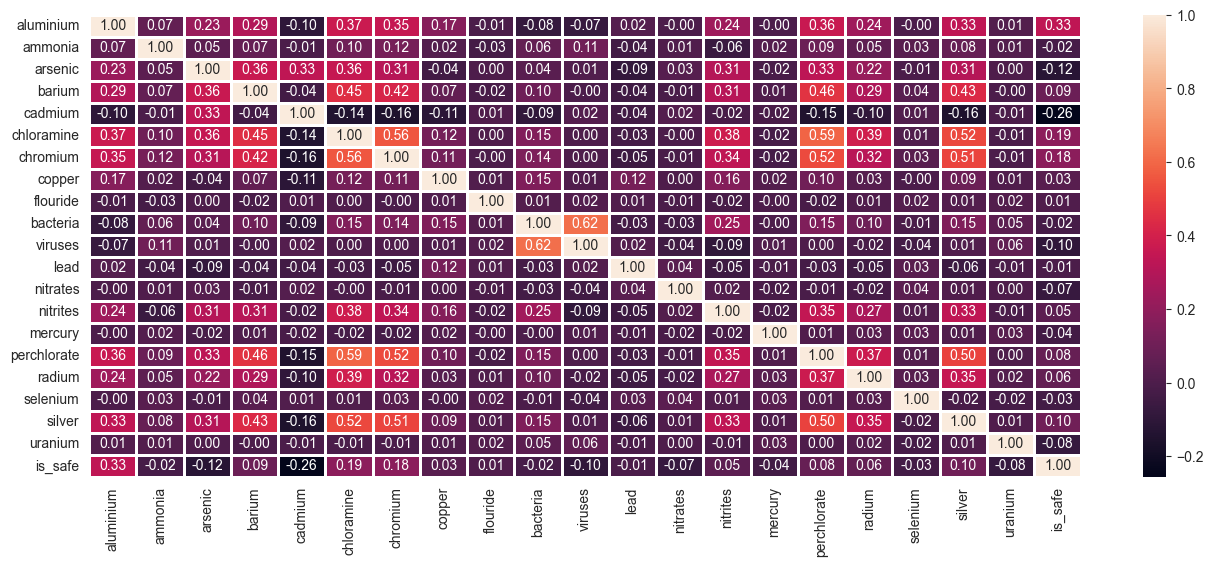

In [78]:
# YOUR CODE CORRELATION MATRIX
corr = water.corr()

plt.figure(figsize=(16, 6))
sns.heatmap(corr,
            fmt='0.2f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            linewidth = 1)

# sns.heatmap(corr, 
#             annot=True, 
#             fmt='d', 
#             cbar=False, 
#             cmap="coolwarm_r", 
#             xticklabels=corr.columns.values, 
#             yticklabels=corr.columns.values, 
#             linewidth = 1)

In [64]:
corr_abs = corr.abs()
corr_abs = corr_abs.unstack()
corr_abs = corr_abs.sort_values(ascending=False)
corr_abs.iloc[21:]

bacteria     viruses        0.618535
viruses      bacteria       0.618535
chloramine   perchlorate    0.588683
perchlorate  chloramine     0.588683
chloramine   chromium       0.555846
chromium     chloramine     0.555846
             perchlorate    0.524432
perchlorate  chromium       0.524432
chloramine   silver         0.522372
silver       chloramine     0.522372
             chromium       0.510705
chromium     silver         0.510705
silver       perchlorate    0.504539
perchlorate  silver         0.504539
             barium         0.462207
barium       perchlorate    0.462207
             chloramine     0.446869
chloramine   barium         0.446869
barium       silver         0.431542
silver       barium         0.431542
chromium     barium         0.415937
barium       chromium       0.415937
chloramine   radium         0.389119
radium       chloramine     0.389119
nitrites     chloramine     0.379916
chloramine   nitrites       0.379916
perchlorate  radium         0.373242
r

#### b) Pairplot **(2 points)**
Create a pairplot including the columns "arsenic", "cadmium", "chromium", "bacteria", "viruses", "nitrates", "mercury"; and color by the class "is_safe"

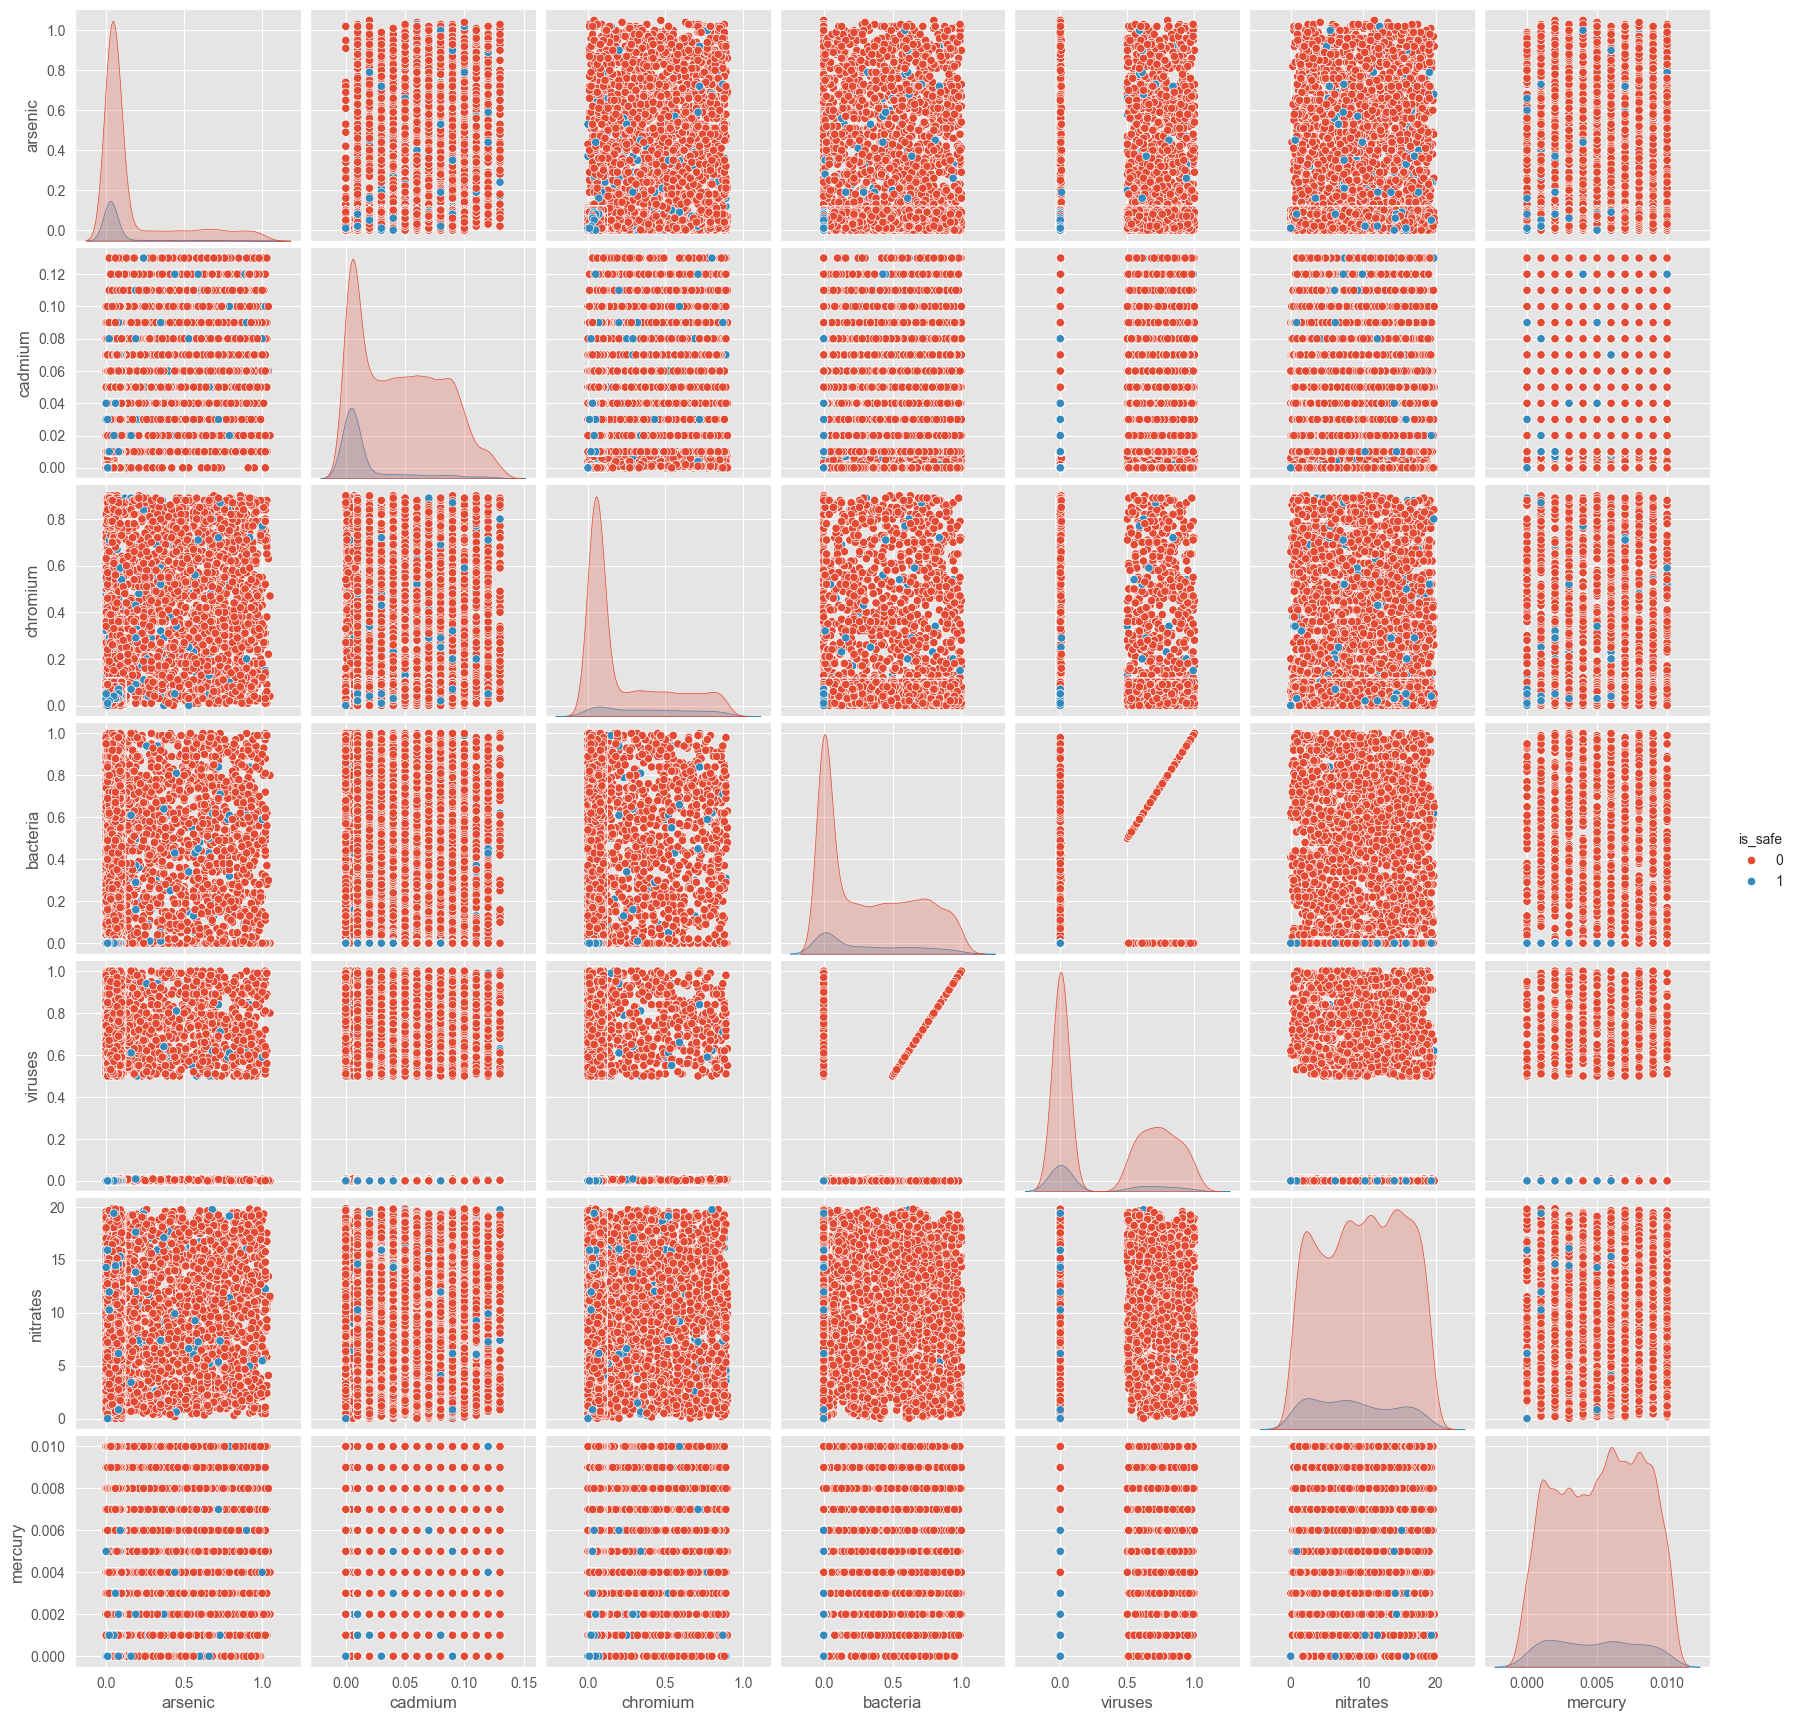

In [37]:
water_col = ['arsenic', 'cadmium', 'chromium', 'bacteria', 'viruses', 'nitrates', 'mercury', 'is_safe']

# YOUR CODE HERE

sns.pairplot(data=water[water_col], hue="is_safe")
plt.show()



#### c) Features and target **(2 points)**
 - Extract the input features and the outcome that you will later use in the predictive model. 
 - Print the number of observations of class 0 and of class 1.


In [38]:
all_cols = water.columns[:-1]

In [66]:
# YOUR CODE HERE
X = water[all_cols].values
y = water["is_safe"].values

In [67]:
print(f"Total observations: {len(y)}")
print(f"0: {len(y[y == 0])}")
print(f"1: {len(y[y == 1])}")

Total observations: 7996
0: 7084
1: 912


#### d) Split the data in a training (80%) and a test set (20%) **(1 point)**
- Use as parameters for splitting: `random_state=39`, `shuffle=True`
- Print the number of samples in the training and in the test set.


In [41]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=39)
print("trainingset size:", len(X_train))
print("testset size:", len(X_test))

trainingset size: 6396
testset size: 1600


#### e) Use the `StandardScaler()` to scale the input features **(2 points)**


In [42]:
from sklearn.preprocessing import StandardScaler

# YOUR CODE HERE
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Question 2: Logistic Regression Model

#### a) Model training ***(2 points)***
- Build and train a logistic regression classifier, using as parameters `penalty='l2'`, `solver='lbfgs'`, `max_iter=1000`

In [43]:
from sklearn.linear_model import LogisticRegression

# YOUR CODE HERE
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### b) Model Accuracy ***(3 points)***
- Compute the accuracy on the training and test set. 
- Compute also the base (default) rate and compare it to the performance of your model. Which one is better?
- Provide a short comment reflecting your opinion on using accuracy as performance measure for this problem.

**<font color='red'>ADD YOUR ANSWER HERE!</font>**



In [44]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
print(f"Train set accuracy_score: {accuracy_score(y_train, y_pred_train):.2f}")

y_pred_test = model.predict(X_test)
print(f"Test set accuracy_score: {accuracy_score(y_test, y_pred_test):.2f}")

Train set accuracy_score: 0.91
Test set accuracy_score: 0.91


#### b) Confusion matrix ***(3 points)***
- Plot a heatmap of the confusion matrix. Class 1 is the positive class. 
- What does a false positive mean for our problem and how many false positive did you obtain?

**<font color='red'>ADD YOUR ANSWER HERE!</font>**

A false positive would be problematic because we don't want to classify unsafe water as safe. I get 122 of those.

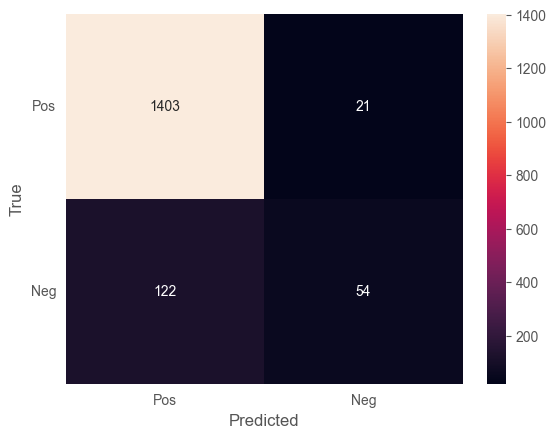

In [45]:
from sklearn.metrics import confusion_matrix

# YOUR CODE HERE

cm = confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(cm, index=["Pos", "Neg"], columns=["Pos", "Neg"])
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.yticks(rotation=0) 
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

#### c) Other performance measures ***(2 points)***
- What is the precision, recall, and f1 score of class 1 (safe) for the test set?

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
# YOUR CODE HERE
print(f"precision_score: {precision_score(y_test, y_pred_test):.2f}")
print(f"recall_score: {recall_score(y_test, y_pred_test):.2f}")
print(f"f1_score: {f1_score(y_test, y_pred_test):.2f}")

precision_score: 0.72
recall_score: 0.31
f1_score: 0.43


### Question 3: Decision Trees

#### a) Train a decision tree model ***(2 points)***
- Use the parameters `criterion = 'gini'`, `max_depth = 3`

In [47]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### b) Performance evaluation ***(5 points)***
- Plot a heatmap of the confusion matrix;
- Compute the accuracy on the training and test set;
- Compute the the precision, recall, and f1 score of class 1 for the test set;
- How do your performance metrics compare to your previous model?

**<font color='red'>ADD YOUR ANSWER HERE!</font>**

*I get the same metrics, the models are both equally good*

Train set accuracy_score: 0.91
Test set accuracy_score: 0.91


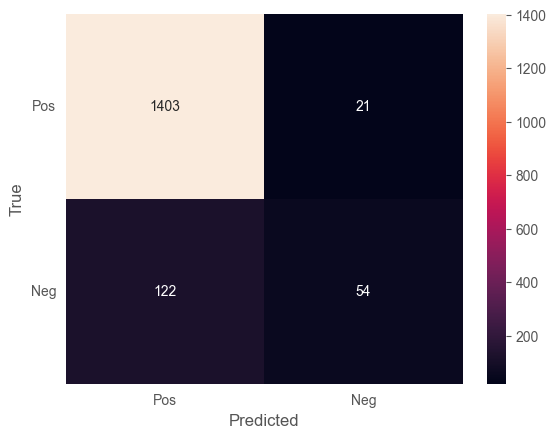

precision_score: 0.72
recall_score: 0.31
f1_score: 0.43


In [48]:
# YOUR CODE HERE

y_pred_train = model_tree.predict(X_train)
print(f"Train set accuracy_score: {accuracy_score(y_train, y_pred_train):.2f}")

y_pred_test = model_tree.predict(X_test)
print(f"Test set accuracy_score: {accuracy_score(y_test, y_pred_test):.2f}")

cm = confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(cm, index=["Pos", "Neg"], columns=["Pos", "Neg"])
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.yticks(rotation=0) 
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

print(f"precision_score: {precision_score(y_test, y_pred_test):.2f}")
print(f"recall_score: {recall_score(y_test, y_pred_test):.2f}")
print(f"f1_score: {f1_score(y_test, y_pred_test):.2f}")

#### c) Tree Visualization **(2 points)**
- Visualize your Decision Tree

[Text(0.5, 0.875, 'x[0] <= -0.212\ngini = 0.204\nsamples = 6396\nvalue = [5660, 736]'),
 Text(0.25, 0.625, 'x[0] <= -0.362\ngini = 0.084\nsamples = 4909\nvalue = [4693, 216]'),
 Text(0.125, 0.375, 'x[19] <= -0.36\ngini = 0.072\nsamples = 4671\nvalue = [4496, 175]'),
 Text(0.0625, 0.125, 'gini = 0.122\nsamples = 1832\nvalue = [1712, 120]'),
 Text(0.1875, 0.125, 'gini = 0.038\nsamples = 2839\nvalue = [2784, 55]'),
 Text(0.375, 0.375, 'x[18] <= -0.369\ngini = 0.285\nsamples = 238\nvalue = [197, 41]'),
 Text(0.3125, 0.125, 'gini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.4375, 0.125, 'gini = 0.182\nsamples = 188\nvalue = [169, 19]'),
 Text(0.75, 0.625, 'x[4] <= -0.918\ngini = 0.455\nsamples = 1487\nvalue = [967.0, 520.0]'),
 Text(0.625, 0.375, 'x[15] <= 1.048\ngini = 0.46\nsamples = 757\nvalue = [271, 486]'),
 Text(0.5625, 0.125, 'gini = 0.206\nsamples = 464\nvalue = [54, 410]'),
 Text(0.6875, 0.125, 'gini = 0.384\nsamples = 293\nvalue = [217.0, 76.0]'),
 Text(0.875, 0.375, 'x[

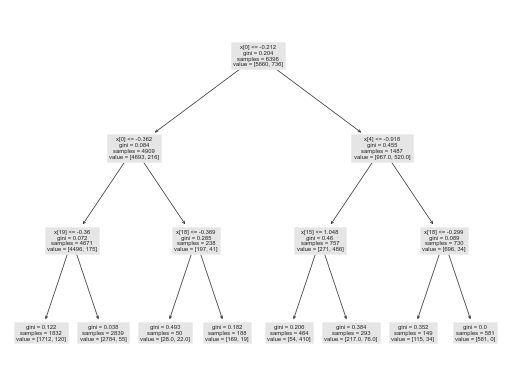

In [49]:
from sklearn.tree import plot_tree

# YOUR CODE HERE
plot_tree(model_tree)

#### d) Hyperparameter selection ***(2 points)***
- Use `GridSearchCV` with 5 folds to explore different parameters for your model: `criterion` either 'gini' or 'entropy' and `max_depth` between 1 and 7 (the grid is provided for you in the code snippet below)
- Print the optimal values for the hyperparameters.

In [50]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV   

# Define parameters to test
grid_tree = {'criterion':['gini','entropy'] ,     # criterion
        'max_depth':np.arange(1,8),               # array from 1 to 7, maximum depth
       }

# YOUR CODE HERE
clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_tree, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7])})

In [51]:
print(f"best parameters: {clf.best_params_}")

best parameters: {'criterion': 'entropy', 'max_depth': 7}


#### e) Final model ***(4 points)***
For your "optimal" model (based on the hyperparameters selected in the previous step):

- Compute the accuracy on the training and test set;
- Compute the precision, recall, and f1 score of class 1 on the test set.
- How do your metrics compare to those of your previous decision tree model? Which model has better performance?

**<font color='red'>ADD YOUR ANSWER HERE!</font>**

Using the grid search we have definitely found a much better model, the metrics are better.

In [52]:
# YOUR CODE HERE

best_clf = clf.best_estimator_.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print("Test set:")
print(f"accuracy_score: {accuracy_score(y_test, y_pred):.2f}")
print(f"precision_score: {precision_score(y_test, y_pred):.2f}")
print(f"recall_score: {recall_score(y_test, y_pred):.2f}")
print(f"f1_score: {f1_score(y_test, y_pred):.2f}")

Test set:
accuracy_score: 0.97
precision_score: 0.93
recall_score: 0.74
f1_score: 0.83


In [53]:
y_pred = best_clf.predict(X_train)
print("Test set:")
print(f"accuracy_score: {accuracy_score(y_train, y_pred):.2f}")
print(f"precision_score: {precision_score(y_train, y_pred):.2f}")
print(f"recall_score: {recall_score(y_train, y_pred):.2f}")
print(f"f1_score: {f1_score(y_train, y_pred):.2f}")

Test set:
accuracy_score: 0.98
precision_score: 0.97
recall_score: 0.84
f1_score: 0.90


## Assignment 2: Clustering based on movie preferences
The goal here is to discover clusters of individuals based on their preferences regarding movie genres. The dataset contains two features for a set of users, namely:
- the average rating of all science fiction movies they rated,
- the average rating of all comedy movies they rated.

#### Data loading
Load the data in a dataframe and display the first 10 observations.

In [54]:
#Loading data
df_clustering = pd.read_csv('./movie_ratings.csv')
df_clustering.head(10)

,avg_scifi_rating,avg_comedy_rating
0,3.50,2.71
1,2.56,2.64
2,2.00,3.20
3,3.18,2.83
4,3.00,3.90
5,2.33,3.20
6,3.00,3.63
7,2.30,3.40
8,3.11,3.39
9,2.85,2.47


## Question 4: K-Means
#### a) Model fitting and model selection ***(4 points)***
- Implement the Elbow method to determine the optimum number of cluster for K-Means algorithm (use `random_state=17` as parameter of K-Means).
- Based on the Elbow method, how many clusters do you think is optimal and why? 

Text(0.5, 1.0, 'Elbow curve')

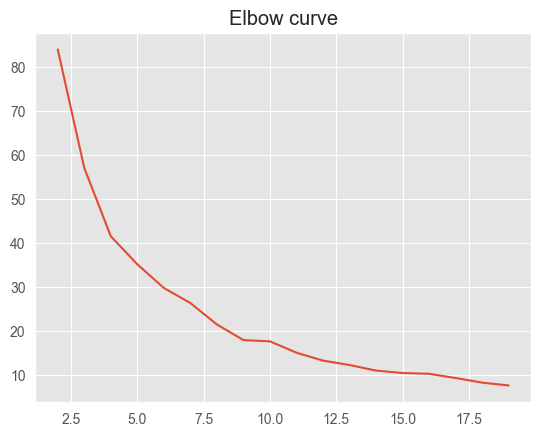

In [55]:
from sklearn.cluster import KMeans

# YOUR CODE HERE

X = df_clustering.values
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=17)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')


#### b) Fit final model ***(2 points)***
- Train a K-Means algorithm with the number of clusters you chose with the Elbow method. Use again `random_state=17` as parameter.

In [56]:
# YOUR CODE HERE

model_kmeans = KMeans(n_clusters=4, random_state=17)
model_kmeans.fit(X)


KMeans(n_clusters=4, random_state=17)

#### c) Plot the clustering results ***(4 points)***
- Create a scatterplot of 'avg_scifi_rating' and 'avg_comedy_rating' where each point is colored by the clusters predicted with your KMeans model.
- Add the cluster centers to your plot. You can use the symbol "x" for the centroids.


In [57]:
model_kmeans.cluster_centers_

array([[2.92868852, 3.60540984],
       [2.835     , 2.86597222],
       [3.87705882, 2.42117647],
       [1.47764706, 3.25588235]])

In [58]:
model_kmeans.labels_.shape

(167,)

Text(0.5, 1.0, 'sklearn k-means')

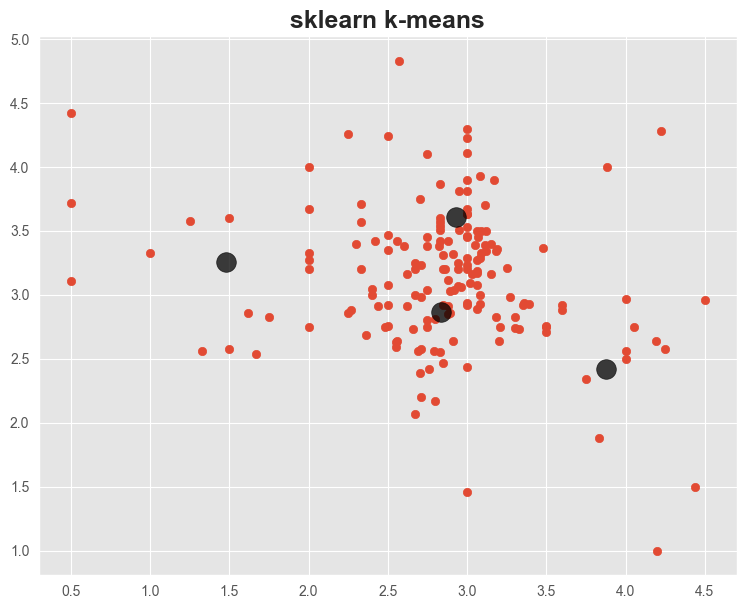

In [69]:
# YOUR CODE HERE
# plt.scatter(df_clustering["avg_scifi_rating"], df_clustering["avg_comedy_rating"], c=model_kmeans.labels_)
# plt.plot(model_kmeans.cluster_centers_, 'rx')


# visualize prediction
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(df_clustering["avg_scifi_rating"], df_clustering["avg_comedy_rating"])

# get centers for plot
centers = model_kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.title('sklearn k-means', fontsize=18, fontweight='demi')